### Part 2: Predicting mortality in ICUs
#### Part a:

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string, re

In [3]:
class Dataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target

In [4]:
dataset = pd.read_csv("~/csc2548_ml4h/adult_icu.gz", compression='gzip')

trainset = dataset[dataset.train == 1]
trainset.pop("train")
target = trainset.pop("mort_icu")
train = Dataset(trainset, target)

testset = dataset[dataset.train == 0]
testset.pop("train")
target = testset.pop("mort_icu")
test = Dataset(testset, target)

In [5]:
logisticRegression = LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000)
logisticRegression.fit(train.data, train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

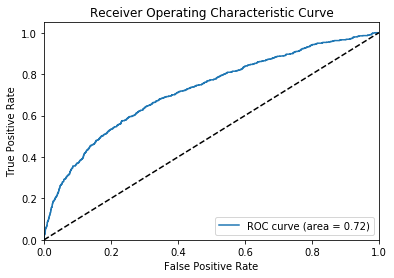

'AUC Score = 0.72'

In [6]:
prediction = logisticRegression.predict_proba(test.data)
fpr, tpr, thresholds = roc_curve(test.target.values, prediction[:, 1])
auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
display("AUC Score = " + str(round(auc, 2)))

# Comment on model performance

In [7]:
accuracy = logisticRegression.score(test.data, test.target) * 100
str(round(accuracy, 2)) + "%"

'90.65%'

In [8]:
feature_coefs = pd.Series(logisticRegression.coef_[0], index=train.data.columns)
feature_coefs.sort_values(ascending=False, inplace=True)
display("Top 5 risk factors of mortality:")
display(feature_coefs.head(5).index.tolist())
display("Lowest 5 risk factors of mortality:")
display(feature_coefs.tail(5).index.tolist())

'Top 5 risk factors of mortality:'

['bun', 'heartrate_max', 'glucose_mean', 'heartrate_mean', 'ptt']

'Lowest 5 risk factors of mortality:'

['diasbp_min', 'sysbp_mean', 'meanbp_min', 'spo2_min', 'sysbp_min']

# Explain what the above means
What about the hint???

In [9]:
feature_coefs

bun                  1.100053e-02
heartrate_max        9.881349e-03
glucose_mean         7.534194e-03
heartrate_mean       4.734961e-03
ptt                  4.644338e-03
age                  3.971163e-03
resprate_max         3.259757e-03
wbc                  3.113088e-03
pt                   2.645801e-03
meanbp_max           2.565797e-03
resprate_mean        2.505620e-03
aniongap             2.342920e-03
bilirubin            1.994233e-03
lactate              1.343630e-03
resprate_min         9.151804e-04
heartrate_min        4.959616e-04
phosphate            4.333063e-04
inr                  3.908736e-04
creatinine           2.073790e-04
admType_EMERGENCY    1.739742e-04
eth_other            1.348437e-04
potassium            3.580814e-05
eth_asian            6.110721e-06
admType_URGENT       3.294835e-06
admType_NEWBORN      0.000000e+00
icustay_id          -9.419138e-07
first_hosp_stay     -1.137416e-06
subject_id          -1.403624e-06
hadm_id             -1.709669e-06
magnesium     

#### Part b:

In [146]:
dataset = pd.read_csv("~/csc2548_ml4h/adult_notes.gz", compression='gzip')
dataset = dataset[~pd.isnull(dataset.chartext)]

trainset = dataset[dataset.train == 1]
trainset.reset_index(drop=True, inplace=True)
trainset.pop("train")
target = trainset.pop("mort_icu")
notes_train = Dataset(trainset, target)

testset = dataset[dataset.train == 0]
testset.reset_index(drop=True, inplace=True)
testset.pop("train")
target = testset.pop("mort_icu")
notes_test = Dataset(testset, target)
display(notes_train.data.shape)
display(notes_test.data.shape)

(17956, 4)

(7923, 4)

In [74]:
def testfunc(x):
    return x + 2
testdf = pd.DataFrame([1,2,3,4,5], columns=["A"])
testdf.A = testfunc(testdf.A)
testdf.A
notes_train.data.chartext.head().values.shape

(5,)

In [155]:
stopwordList = stopwords.words("english")

def tokenize(s):
    return [j for j in [re.sub("[^\w\d'\s]+", '', i) for i in word_tokenize(s.lower())] 
            if j not in stopwordList and j != '']

vectorizer = TfidfVectorizer(tokenizer=tokenize)
vectorizer.fit(notes_train.data.chartext)
#testout = vectorizer.fit_transform(notes_train.data.head().chartext)
display(len(vectorizer.get_feature_names()))
#display(testout.toarray().shape)

#notes_train.data = notes_train.data.join(pd.DataFrame(testout.toarray(), columns=vectorizer.get_feature_names()))

#pd.DataFrame(testout.toarray(), columns=vectorizer.get_feature_names())
#notes_test.data.reset_index(drop=True, inplace=True)#print(vectorizer.get_feature_names()[0])

375795

In [158]:
vectorizer.get_feature_names()

["'",
 "''",
 "''let",
 "'0",
 "'0s",
 "'1",
 "'1278",
 "'1syv",
 "'2",
 "'2999",
 "'59chqrstgh",
 "'70s",
 "'80s",
 "'90s",
 "'able",
 "'abnormal",
 "'across",
 "'acting",
 "'acutely",
 "'agua'",
 "'aline",
 "'all",
 "'almost",
 "'am",
 "'an",
 "'apnea",
 "'around",
 "'arthritis",
 "'artifact",
 "'at",
 "'back",
 "'bad",
 "'baseline",
 "'bedtime",
 "'before",
 "'being",
 "'belly",
 "'beth",
 "'big",
 "'bloated",
 "'blood",
 "'bloody",
 "'blossoming",
 "'blow",
 "'bolus",
 "'bone",
 "'borderline",
 "'bottom",
 "'bridge",
 "'buck",
 "'burst",
 "'c",
 "'can",
 "'cap",
 "'capped",
 "'cauterization",
 "'cd",
 "'central",
 "'check",
 "'chest",
 "'choking",
 "'clark",
 "'clean",
 "'clear",
 "'clears",
 "'clock",
 "'code",
 "'cold",
 "'color",
 "'comfortable",
 "'complete",
 "'confused",
 "'constant",
 "'cord",
 "'cortical",
 "'cough",
 "'coughing",
 "'d",
 "'d37",
 "'daughter",
 "'day",
 "'days",
 "'depends",
 "'depressed",
 "'diarrhea",
 "'discomfort",
 "'dislocated",
 "'do",
 "'double",
 "

In [159]:
transformed = vectorizer.transform(notes_train.data.chartext)
notes_train.data = notes_train.data.join(pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names()))

transformed = vectorizer.transform(notes_test.data.chartext)
notes_test.data = notes_test.data.join(pd.DataFrame(transformed.toarray(), columns=vectorizer.get_feature_names()))
# then transform and join notes_test
# then remove subject_id, hadm_id, icustay_id, chartext, and train logisticClassifier
# then test with notes_test (having removed similar) and get top 5 words/lowest 5 words, 
# ROC/AUC, plot, etc

MemoryError: 

In [164]:
notes_test_transformed = vectorizer.transform(notes_test.data.chartext)
notes_test_transformed

<7923x375795 sparse matrix of type '<class 'numpy.float64'>'
	with 5034726 stored elements in Compressed Sparse Row format>